#### **Importing the Desired Packages:**

In [44]:
import numpy as np
import pandas as pd
import pymatreader as pymat
import matplotlib.pyplot as plt

**__________________________________________________________________________________________________________________________**
- [ ] **Task 1: Dataset loading**

In [ ]:
file_name_gt_str = 'Indian_pines_gt.mat'
file_name_all_str = 'Indian_pines.mat'
file_name_corr_str = 'Indian_pines_corrected.mat'
path_str = '/home/shahin/Desktop/Msc.5/مباحث ويژه در مخابرات 1/Ex/ex1/'

In [ ]:
data_gt_ndarray = pymat.read_mat(path_str + file_name_gt_str)['indian_pines_gt']
data_main_ndarray = pymat.read_mat(path_str + file_name_all_str)['indian_pines']
data_corr_ndarray = pymat.read_mat(path_str + file_name_corr_str)['indian_pines_corrected']

- [x] **End of Task 1**
**__________________________________________________________________________________________________________________________**

**__________________________________________________________________________________________________________________________**
**Overview of the Dataset:**

In [ ]:
print(f'Type of the main data: {type(data_main_ndarray)}')
print(f'Shape of the main data: {data_main_ndarray.shape}')

Type of the main data: <class 'numpy.ndarray'>
Shape of the main data: (145, 145, 220)


In [ ]:
print(f'Shape of the corrected data: {data_corr_ndarray.shape}')

Shape of the corrected data: (145, 145, 200)


In [ ]:
print(f'Groundtruth(label) data:\n\n{data_gt_ndarray}\n\n... its data type: \
{data_gt_ndarray.dtype}\nand its shape: {data_gt_ndarray.shape}')

Groundtruth(label) data:

[[3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

... its data type: uint8
and its shape: (145, 145)


* **Classes:**

In [ ]:
print(f'Classes: {np.unique(data_gt_ndarray)}')

Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


**End of Overview**
**__________________________________________________________________________________________________________________________**

**__________________________________________________________________________________________________________________________**

#### **Data Reshaping**:

In [ ]:
data_corr_reshaped_ndarray = data_corr_ndarray.reshape((data_corr_ndarray.shape[0]*data_corr_ndarray.shape[1], \
                                                        data_corr_ndarray.shape[2]))
data_gt_reshaped_ndarray = data_gt_ndarray.flatten()

In [ ]:
print(f'Shape of reshaped corrected data: {data_corr_reshaped_ndarray.shape} = (No. samples, No. features)')
print(f'Shape of reshaped label data: {data_gt_reshaped_ndarray.shape} = (No. targets,)')

Shape of reshaped corrected data: (21025, 200) = (No. samples, No. features)
Shape of reshaped label data: (21025,) = (No. targets,)


In [ ]:
print(f'5 features of first sample of corrected data: {data_corr_ndarray[1, 0, 0: 5]}')
print(f'5 features of first sample of reshaped corrected data: {data_corr_reshaped_ndarray[145, 0: 5]}')

5 features of first sample of corrected data: [2576 4388 4334 4279 4543]
5 features of first sample of reshaped corrected data: [2576 4388 4334 4279 4543]


**End of Data Reshaping**
**__________________________________________________________________________________________________________________________**

**__________________________________________________________________________________________________________________________**
- [ ] **Task 2: Dataset Showing**

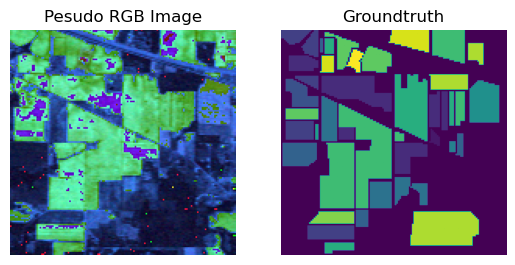

In [ ]:
data_plot_ndarray = data_main_ndarray[:, :, [110, 200, 180]].astype(np.uint8)
plt.subplot(1, 2, 1), plt.imshow(data_plot_ndarray), plt.title('Pesudo RGB Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(data_gt_ndarray), plt.title('Groundtruth'), plt.axis('off')
plt.show()

- [x] **End of Task 2**
**__________________________________________________________________________________________________________________________**

#### Importing the Desired Packages

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

**__________________________________________________________________________________________________________________________**
- [ ] **Task 3: Data Splitting**

In [ ]:
test_size_list = [0.02, 0.05, 0.1]
data = {}
for test_size_float in test_size_list:
    data['X_train_' + str(test_size_float)], data['X_test_' + str(test_size_float)], \
    data['y_train_' + str(test_size_float)], data['y_test_' + str(test_size_float)] =\
    train_test_split(data_corr_reshaped_ndarray, data_gt_reshaped_ndarray, test_size=\
                     test_size_float, random_state=0)

In [ ]:
for i, test_size_float in enumerate(test_size_list):
    print(f'Test size: {test_size_float}')
    print(f'X_train size: {data["X_train_" + str(test_size_float)].shape}')
    print(f'X_test size: {data["X_test_" + str(test_size_float)].shape}')
    print(f'y_train size: {data["y_train_" + str(test_size_float)].shape}')
    text = f'y_test size: {data["y_test_" + str(test_size_float)].shape}'
    if i != len(test_size_list) - 1: text += '\n\n\n'
    print(text)

Test size: 0.02
X_train size: (20604, 200)
X_test size: (421, 200)
y_train size: (20604,)
y_test size: (421,)



Test size: 0.05
X_train size: (19973, 200)
X_test size: (1052, 200)
y_train size: (19973,)
y_test size: (1052,)



Test size: 0.1
X_train size: (18922, 200)
X_test size: (2103, 200)
y_train size: (18922,)
y_test size: (2103,)


- [x] **End of Task 3**
**__________________________________________________________________________________________________________________________**

**__________________________________________________________________________________________________________________________**
- [ ] **Task 4: Finding the Best value for the k-fold Parameter**
- - **Note:** The k-fold (CV) hyperparameter must be: **1 < k-fold < 16**

In [ ]:

test_size_tuple = (0.02, 0.05, 0.1)
k_fold_tuple = range(2, 16)
parameters_for_k_fold_dict = {'test_size': test_size_tuple, 'k_fold': k_fold_tuple}

total_length = 1
for key_name_str in parameters_for_k_fold_dict.keys():
    total_length *= len(parameters_for_k_fold_dict[key_name_str])

test_size_stored_values = np.zeros(total_length)
acc_mean_stored_values = np.zeros(total_length)
k_fold_stored_values = np.zeros(total_length)


clf_without_pca = make_pipeline(StandardScaler(), SVC())
count = 0
for test_size in parameters_for_k_fold_dict['test_size']:
    X_train, y_train, X_test, y_test = data['X_train_' + str(test_size)], data['y_train_' + str(test_size)], \
    data['X_test_' + str(test_size)], data['y_test_' + str(test_size)]
    
    
    clf_without_pca.fit(X_train, y_train)
    for k_fold in parameters_for_k_fold_dict['k_fold']:
        count += 1
        scores = cross_val_score(clf_without_pca, X_train, y_train, cv=k_fold, )
        acc_mean = scores.mean()
        test_size_stored_values[count - 1] = test_size

        acc_mean_stored_values[count - 1] = acc_mean
        k_fold_stored_values[count - 1] = k_fold

                

df_for_k_fold = pd.DataFrame({'Test Size': test_size_stored_values, 'K-fold(CV)': k_fold_stored_values,\
                              'Mean of Accuracy': acc_mean_stored_values})


"\ntest_size_tuple = (0.02, 0.05, 0.1)\nk_fold_tuple = range(2, 16)\nparameters_for_k_fold_dict = {'test_size': test_size_tuple, 'k_fold': k_fold_tuple}\n\ntotal_length = 1\nfor key_name_str in parameters_for_k_fold_dict.keys():\n    total_length *= len(parameters_for_k_fold_dict[key_name_str])\n\ntest_size_stored_values = np.zeros(total_length)\nacc_mean_stored_values = np.zeros(total_length)\nk_fold_stored_values = np.zeros(total_length)\n\n\nclf_without_pca = make_pipeline(StandardScaler(), SVC())\ncount = 0\nfor test_size in parameters_for_k_fold_dict['test_size']:\n    X_train, y_train, X_test, y_test = data['X_train_' + str(test_size)], data['y_train_' + str(test_size)],     data['X_test_' + str(test_size)], data['y_test_' + str(test_size)]\n    \n    \n    clf_without_pca.fit(X_train, y_train)\n    for k_fold in parameters_for_k_fold_dict['k_fold']:\n        count += 1\n        scores = cross_val_score(clf_without_pca, X_train, y_train, cv=k_fold, )\n        acc_mean = scores.me

**Loading the Rusults of the Previous Block:**

In [ ]:
df1 = pd.read_csv(path_str + 'k_fold.csv')
df1 = df1[['Test Size', 'K-fold(CV)', 'Mean of Accuracy']]

In [ ]:
df2 = df1[df1['Test Size'] == 0.02]
df2[df2['Mean of Accuracy'] == df2['Mean of Accuracy'].max()]

,Test Size,K-fold(CV),Mean of Accuracy
13,0.02,15.0,0.75893


In [ ]:
df3 = df1[df1['Test Size'] == 0.05]
df3[df3['Mean of Accuracy'] == df3['Mean of Accuracy'].max()]

,Test Size,K-fold(CV),Mean of Accuracy
24,0.05,12.0,0.758022


In [ ]:
df4 = df1[df1['Test Size'] == 0.1]
df4[df4['Mean of Accuracy'] == df4['Mean of Accuracy'].max()]

,Test Size,K-fold(CV),Mean of Accuracy
41,0.1,15.0,0.755258


- **Results:**
- - The best k-fold for **test_size_0.02** is **15**
- - The best k-fold for **test_size_0.05** is **12**
- - The best k-fold for **test_size_0.1** is **15**





- [x] **End of Task 4**
**__________________________________________________________________________________________________________________________**

**__________________________________________________________________________________________________________________________**
- [ ] **Task 5:**

- - **Determining the No. Components Patameter for the PCA Function:**

In [ ]:
X_train = data['X_train_' + str(0.1)]
svd = np.linalg.svd(X_train)
eigen_values = svd[1]

In [ ]:
np.sum(eigen_values[0: 99])/np.sum(eigen_values)

0.9900484201630164

- - - n_components for **X_train_0.02** is **99**
- - - n_components for **X_train_0.05** is **99**
- - - n_components for **X_train_0.1** is **99**

- [x] **End of Task 5**
**__________________________________________________________________________________________________________________________**

**_______________________________________________________________________________________________________________________**
- [ ] **Task 6:**
- - **Determining the best hyperparameters for the "Scaler -> PCA -> SVM" pipeline by using Gridsearch algorithm:**

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=99)
svc = SVC(kernel='rbf',)

In [ ]:
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("svc", svc)])

In [ ]:
param_grid = {"svc__C": [1e-3]}

In [ ]:
best_k_fold_dict = {0.02: 15, 0.05: 12, 0.1: 15}

In [31]:
test_size = 0.02
X_train, y_train = data['X_train_' + str(test_size)], data['y_train_' + str(test_size)]
search = GridSearchCV(pipe, param_grid, cv=best_k_fold_dict[test_size])
search.fit(X_train, y_train)

GridSearchCV(cv=15,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=99)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001]})

In [32]:
best_params = search.best_params_
best_params

{'svc__C': 0.001}

In [33]:
best_score = search.best_score_
best_score

0.5124733501475217

- - - **Gridsearch Results for Test_size=0.02:**
- - - - The Best Type of **Kernel** is **RBF**
- - - - The Best Value for $\gamma$ is **0.05**
- - - - The Best Value for Regularization Parameter (C or $\lambda$) is **1e6**


- [x] **End of Task 6**
**_______________________________________________________________________________________________________________________**

**_______________________________________________________________________________________________________________________**
- [ ] **Task 7:**
- **Comparison between two Pipelines:**

- - **Result of the determined hyperparameters for the "Scaler -> PCA -> SVM" pipeline:**

In [34]:
test_size = 0.02
X_train, y_train, X_test, y_test = data['X_train_' + str(test_size)], data['y_train_' + str(test_size)], \
data['X_test_' + str(test_size)], data['y_test_' + str(test_size)]

In [35]:
scaler = StandardScaler()
pca = PCA(n_components=99)
svc = SVC(kernel='rbf', gamma=0.05, C=1e6)

clf = make_pipeline(scaler, pca, svc)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ov_acc = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

In [36]:
acc_for_each_class = matrix.diagonal()/matrix.sum(axis=1)
df_result1 = pd.DataFrame({'Class': range(1, 17), 'Accuracy': acc_for_each_class})
df_result1

,Class,Accuracy
0,1,0.907834
1,2,0.000000
2,3,0.750000
3,4,0.857143
4,5,0.500000
5,6,0.777778
6,7,0.812500
7,8,1.000000
8,9,1.000000
9,10,0.833333


In [37]:
df_result2 = pd.DataFrame({'Overall Accuracy': ov_acc, '\u03BA': kappa}, index=[0])
df_result2

,Overall Accuracy,κ
0,0.828979,0.747827


In [38]:
pd.DataFrame({'Test Size': [0.02, 0.05, 0.1], 'Accuracy': [0.8289, 0.8212, 0.8207]})

,Test Size,Accuracy
0,0.02,0.8289
1,0.05,0.8212
2,0.10,0.8207


- - **Result of the determined hyperparameters for the "Scaler -> SVM" pipeline:**

In [39]:
test_size = 0.02
X_train, y_train, X_test, y_test = data['X_train_' + str(test_size)], data['y_train_' + str(test_size)], \
data['X_test_' + str(test_size)], data['y_test_' + str(test_size)]

In [40]:
scaler = StandardScaler()
svc = SVC(kernel='rbf', gamma=0.05, C=1e6)

clf = make_pipeline(scaler, svc)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ov_acc = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

In [41]:
acc_for_each_class = matrix.diagonal()/matrix.sum(axis=1)
df_result1 = pd.DataFrame({'Class': range(1, 17), 'Accuracy': acc_for_each_class})
df_result1

,Class,Accuracy
0,1,0.903226
1,2,0.000000
2,3,0.833333
3,4,0.928571
4,5,0.500000
5,6,0.777778
6,7,0.812500
7,8,1.000000
8,9,1.000000
9,10,0.800000


In [42]:
df_result2 = pd.DataFrame({'Overall Accuracy': ov_acc, '\u03BA': kappa}, index=[0])
df_result2

,Overall Accuracy,κ
0,0.831354,0.751385


In [43]:
pd.DataFrame({'Test Size': [0.02, 0.05, 0.1], 'Accuracy': [0.8313, 0.8241, 0.8264]})

,Test Size,Accuracy
0,0.02,0.8313
1,0.05,0.8241
2,0.10,0.8264


- [x] **End of Task 7**
**_______________________________________________________________________________________________________________________**

- - **Conclusion:**
- - - By using the PCA block the Accuracy decreases a few but Learning is done faster.

**_____________________________________________________________________________________________________________________**

- **Resources:**
**_____________________________________________________________________________________________________________________**
- -  [**Indian Pines Hyperspectral Dataset from "Hyperspectral Remote Sensing Scenes"**](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Indian_Pines)
- - [**Dataset Splitting to Train and Test Data from "sklearn"**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=sklearn+model_selection+train_test#sklearn.model_selection.train_test_split)
- - [**Determine the best k-fold for each splitted data:**](https://scikit-learn.org/stable/modules/cross_validation.html?highlight=k+fold)
- - [**Applying the "PCA -> SVM" Pipeline**](https://scikit-learn.org/stable/modules/svm.html#svm-classification)
- - [**Calculation of Accuracy:**](https://scikit-learn.org/stable/modules/model_evaluation.html?highlight=accuracy)
- - - [**Kappa score**](https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-kappa)
- - - [**k-fold CV**](https://scikit-learn.org/stable/modules/cross_validation.html?highlight=k+fold)
- - - [**Accuracy for each class from StackOverflow**](https://stackoverflow.com/questions/39770376/scikit-learn-get-accuracy-scores-for-each-class)
- - - [**Hyperparameters:**](https://scikit-learn.org/stable/modules/cross_validation.html?highlight=k+fold)
- - - - **Finding _C, k-fold(CV), kernel and degree_ by using [Gridsearch_1](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html), [Gridsearch_2](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)**
**_____________________________________________________________________________________________________________________**